# **Assignment - 1**

### **Ques 1: Explain the role of weights in a neuron.**

### Ans: Weights determine the importance of each input to a neuron. Each input is multiplied by its corresponding weight before being summed. A higher weight means greater influence, while a lower or negative weight reduces or reverses the effect of the input. During training, weights are adjusted to minimize error, enabling the neuron to learn patterns and make accurate predictions.

### **Ques 2: What is an activation function?**

### Ans: An activation function is a mathematical function applied to the output of a neuron after computing the weighted sum of its inputs. It determines whether the neuron should be activated and how strongly it should respond. Activation functions introduce non-linearity into the model, enabling neural networks to learn complex patterns and relationships beyond simple linear combinations. Without activation functions, even a multi-layer neural network would behave like a single linear model. They also help control the output range and improve the learning process, making them essential components of deep learning models.

### **Ques 3: Define probability distribution in ML context.**

### Ans : A probability distribution in the context of machine learning describes how the possible values of a random variable are distributed along with their corresponding probabilities. It shows the likelihood of different outcomes occurring in a dataset. In ML, probability distributions are used to model uncertainty, make predictions, and estimate parameters from data. They help algorithms understand patterns in data by assigning probabilities to events or values, forming the foundation of many statistical and predictive models.

### **Ques 4: What is gradient in optimization?**

### Ans: A gradient in optimization is a vector of partial derivatives that indicates the direction and rate of the steepest increase of a function. In machine learning, it represents how much the loss function changes with respect to each model parameter. The gradient is used in optimization algorithms like gradient descent to update weights by moving them in the opposite direction of the gradient, thereby minimizing the error and improving the model’s performance.

### **Ques 5: Create a project using logistic regression with tensor?**

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
study_hours = tf.constant(
    [1, 2, 1.5, 3, 2.5, 4, 3.5, 5, 4.5, 6, 5.5, 7, 6.5, 8, 7.5],
    dtype=tf.float32
)

study_hours = tf.reshape(study_hours, (-1, 1))

exam_result = tf.constant(
    [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    dtype=tf.float32
)

exam_result = tf.reshape(exam_result, (-1, 1))

In [9]:
weight = tf.Variable(tf.zeros((1, 1), dtype=tf.float32))
bias = tf.Variable(0.0, dtype=tf.float32)

def sigmoid(x):
    return tf.sigmoid(x)

def model(X):
    return sigmoid(tf.matmul(X, weight) + bias)

def loss_function(y_true, y_pred):
    return tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(y_true, y_pred)
    )

In [10]:
learning_rate = 0.3
epochs = 700

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(study_hours)
        loss = loss_function(exam_result, predictions)

    gradients = tape.gradient(loss, [weight, bias])
    weight.assign_sub(learning_rate * gradients[0])
    bias.assign_sub(learning_rate * gradients[1])

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.2524
Epoch 200, Loss: 0.1854
Epoch 300, Loss: 0.1550
Epoch 400, Loss: 0.1369
Epoch 500, Loss: 0.1246
Epoch 600, Loss: 0.1155


In [11]:
test_hours = tf.constant([[2.2], [4.8], [6.2]], dtype=tf.float32)
probabilities = model(test_hours)
predictions = tf.cast(probabilities > 0.5, tf.int32)

print("Probabilities:\n", probabilities.numpy())
print("Predictions:\n", predictions.numpy())

Probabilities:
 [[0.0531144 ]
 [0.9096918 ]
 [0.99396914]]
Predictions:
 [[0]
 [1]
 [1]]


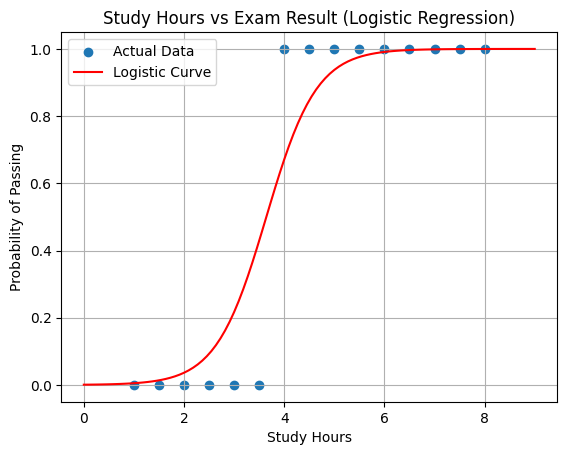

In [12]:
x_range = np.linspace(0, 9, 100).reshape(-1, 1).astype(np.float32)
y_curve = model(tf.constant(x_range)).numpy()

plt.scatter(study_hours, exam_result, label="Actual Data")
plt.plot(x_range, y_curve, color="red", label="Logistic Curve")

plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Study Hours vs Exam Result (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()